In [1]:
import pandas as pd

df = pd.read_csv('fj.csv')

In [2]:
df

,Unnamed: 0,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,...,description_na,requirements_na,benefits_na,posting,char_count,word_count,stopword_count,misspelled_count,misspelled_percent,average_word_length
0,0,1,Marketing Intern,"US, NY, New York",Marketing,MISSING,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,MISSING,...,0,0,1,"marketing intern marketing we're food52, and w...",2716,388,141,80,0.206186,7.000000
1,1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,MISSING,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,...,0,0,0,customer service - cloud video production succ...,6207,910,345,97,0.106593,6.820879
2,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",MISSING,MISSING,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,MISSING,...,0,0,1,commissioning machinery assistant (cma) missin...,2687,365,147,47,0.128767,7.361644
3,3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,MISSING,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,...,0,0,0,account executive - washington dc sales our pa...,5527,717,233,119,0.165969,7.708508
4,4,5,Bill Review Manager,"US, FL, Fort Worth",MISSING,MISSING,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,...,0,0,0,bill review manager missing spotsource solutio...,4036,482,130,104,0.215768,8.373444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,MISSING,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,...,0,0,0,account director - distribution sales vend is...,5371,868,384,114,0.131336,6.187788
17876,17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,MISSING,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,...,0,0,0,payroll accountant accounting weblinc is the e...,4815,665,239,118,0.177444,7.240602
17877,17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",MISSING,MISSING,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,MISSING,...,0,0,1,project cost control staff engineer - cost con...,2864,379,127,44,0.116095,7.556728
17878,17878,17879,Graphic Designer,"NG, LA, Lagos",MISSING,MISSING,MISSING,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,...,0,0,0,graphic designer missing missing nemsia studio...,1309,208,81,26,0.125000,6.293269


In [3]:
# Swap missing with na
df = df.apply(lambda x: x.apply(lambda y: "" if y=="MISSING" else y))

In [4]:
# Remove stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text_col = ["title", "company_profile", "description", "requirements", "benefits"]
 
def remove_stop_words(text):
    text = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word.isalpha() and not word in stop_words]
    return ' '.join(text)

X = df.apply(lambda row: pd.Series({col: remove_stop_words(row[col]) for col in text_col}), axis=1)
y = df['fraudulent']

In [5]:
X

,title,company_profile,description,requirements,benefits
0,marketing intern,created groundbreaking cooking site support co...,james beard online food community curated reci...,experience content management systems major pl...,
1,customer service cloud video production,seconds worlds cloud video production seconds ...,organised focused vibrant awesome passion cust...,expect key responsibility communicate client s...,get usthrough part seconds team gain experienc...
2,commissioning machinery assistant cma,valor services provides workforce solutions me...,client located houston actively seeking experi...,implement commissioning procedures rotary acti...,
3,account executive washington dc,passion improving quality life geography heart...,company esri environmental systems research in...,education bachelor master gis business adminis...,culture anything collaborative creative enviro...
4,bill review manager,spotsource solutions llc global human capital ...,job title itemization review managerlocation f...,qualifications rn license state texasdiploma b...,full benefits offered
...,...,...,...,...,...
17875,account director distribution,vend looking awesome new talent come join us w...,case first time visited website vend award win...,ace role eat comprehensive statements work bre...,expect us open culture openly share results in...
17876,payroll accountant,weblinc platform services provider fastest gro...,payroll accountant focus primarily payroll fun...,desire fun love genuine passion accounting pay...,health amp wellnessmedical planprescription dr...
17877,project cost control staff engineer cost contr...,provide full time permanent positions many med...,experienced project cost control staff enginee...,least years professional work diverse team env...,
17878,graphic designer,,nemsia studios looking experienced designer jo...,must fluent latest versions corel amp adobe cc...,competitive salary compensation based experien...


In [6]:
[df[col].apply(lambda x: len(x.split())).max() for col in text_col ]

[19, 885, 2115, 1645, 694]

In [7]:
df["full_listing"] = df.apply(lambda row: "".join([entry + " " for entry in row[text_col]]), axis = 1)

In [9]:
# Build url remover
import regex as re
def remove_url(text):
    text = re.sub(r'#URL+_\S+', '', text)
    text = re.sub(r'http://\S+', '', text)
    return text

In [10]:
# remove url's from listing
df["full_listing"] = df["full_listing"].apply(remove_url)
df["full_listing"] = df["full_listing"].apply(remove_stop_words)

In [11]:
df["language"][df["language"] != "en"]

180      ca
491      el
549      el
556      es
935      el
         ..
17270    es
17327    el
17339    es
17356    el
17780    es
Name: language, Length: 138, dtype: object

## Train Test Split

In [12]:
indices = df.groupby("company_profile").apply(lambda x: [i for i in x.index])

In [13]:
y = df['fraudulent']
indices_tf = y[[i[0]for i in indices]]

In [14]:
from sklearn.model_selection import train_test_split
train_idx, test_idx = train_test_split(indices, stratify = indices_tf, test_size=0.20, random_state = 422)

In [15]:
# Collapsing arrays
import numpy as np
train_idx = np.hstack(train_idx.apply(np.array).values)
test_idx = np.hstack(test_idx.apply(np.array).values)

In [16]:
# Testing for validity
len(train_idx) + len(test_idx) == len(df)

True

In [17]:
X_train, X_test = df["full_listing"].loc[train_idx], df["full_listing"].loc[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

In [18]:
X

,title,company_profile,description,requirements,benefits
0,marketing intern,created groundbreaking cooking site support co...,james beard online food community curated reci...,experience content management systems major pl...,
1,customer service cloud video production,seconds worlds cloud video production seconds ...,organised focused vibrant awesome passion cust...,expect key responsibility communicate client s...,get usthrough part seconds team gain experienc...
2,commissioning machinery assistant cma,valor services provides workforce solutions me...,client located houston actively seeking experi...,implement commissioning procedures rotary acti...,
3,account executive washington dc,passion improving quality life geography heart...,company esri environmental systems research in...,education bachelor master gis business adminis...,culture anything collaborative creative enviro...
4,bill review manager,spotsource solutions llc global human capital ...,job title itemization review managerlocation f...,qualifications rn license state texasdiploma b...,full benefits offered
...,...,...,...,...,...
17875,account director distribution,vend looking awesome new talent come join us w...,case first time visited website vend award win...,ace role eat comprehensive statements work bre...,expect us open culture openly share results in...
17876,payroll accountant,weblinc platform services provider fastest gro...,payroll accountant focus primarily payroll fun...,desire fun love genuine passion accounting pay...,health amp wellnessmedical planprescription dr...
17877,project cost control staff engineer cost contr...,provide full time permanent positions many med...,experienced project cost control staff enginee...,least years professional work diverse team env...,
17878,graphic designer,,nemsia studios looking experienced designer jo...,must fluent latest versions corel amp adobe cc...,competitive salary compensation based experien...


## Actually Building the Network (FAILED), IGNORE ALL THESE COD EBLOCKS


In [19]:
# Actually building the neural network
!pip install keras
!pip install keras_preprocessing
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
 
max_words = 20000
max_length = 20
 
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(sequences, maxlen=max_length)

In [20]:
X_train

array([[ 7579,  7101,  9730, ...,    59,   624,  1418],
       [ 7579,  7101,  9730, ...,    59,   624,  1418],
       [ 2145,  3859,   198, ...,  5431,    22,  9732],
       ...,
       [  848,   719,    88, ...,   140,  1693,  2320],
       [  694, 18132,   410, ...,   457,    16,    46],
       [   68,  1052,  9744, ...,   101,   214,   333]])

In [21]:
!pip install keras
!pip install tensorflow

In [ ]:
import numpy as np
import torch

import tensorflow.keras.backend as K
K.tensorflow_backend._get_available_gpus()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.layers import Embedding
 
model = Sequential() 
model.add(Embedding(max_words, 32, input_length=max_length)) 
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

In [ ]:
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=20)

In [ ]:
hist.history['val_accuracy']

In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(test_sequences, maxlen=max_length)

In [ ]:
y_hat = model.predict(X_test)

In [ ]:
y_hat = y_hat.flatten()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test == 1, y_hat > 0.5))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test == 1, y_hat > 0.5)

In [ ]:
41/(41+622)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_hat)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)

In [ ]:
pd.read_csv("fj.csv")

# Screw the earlier stuff, NN without text data

In [41]:
fj = pd.read_csv("fj.csv")

In [42]:
# Train Test Split
import numpy as np
y = fj["fraudulent"]
indices = fj.groupby("company_profile").apply(lambda x: [i for i in x.index])
indices_tf = y[[i[0]for i in indices]]
from sklearn.model_selection import train_test_split
train_idx, test_idx = train_test_split(indices, stratify = indices_tf, test_size=0.20, random_state = 422)
train_idx = np.hstack(train_idx.apply(np.array).values)
test_idx = np.hstack(test_idx.apply(np.array).values)

In [43]:
# READ IN DATA (Choose data with profile field or without)
model_data_raw = pd.read_csv('fj.csv', index_col = 0,  encoding='utf-8')
#model_data_raw = pd.read_csv('fj_no_profile.csv')

# creating copy so original can still be accessed
model_data = model_data_raw.copy()

# droping unstructured columns
model_data.drop(['job_id','title','salary_range','description','requirements','benefits','company_profile','posting'], axis = 1, inplace = True)

# Get number of unique countries
def getCountry(location):
    return str(location).split(',')[0]
#model_data['location'] = model_data['location'].apply(getCountry)


# one-hot encoding categorical variables
categorical_cols = ['location', 'employment_type', 'required_experience', 'required_education', 'function', 'department','industry'] 

model_data = pd.get_dummies(model_data, columns = categorical_cols)

# splitting data into train and test
X = model_data.drop('fraudulent', axis = 'columns')
y = model_data['fraudulent']
X_train, X_test, y_train, y_test = X.loc[train_idx], X.loc[test_idx], y[train_idx], y[test_idx]

In [44]:
X_train

,telecommuting,has_company_logo,has_questions,NAN Columns,title_na,company_profile_na,description_na,requirements_na,benefits_na,char_count,...,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Venture Capital & Private Equity,industry_Veterinary,industry_Warehousing,industry_Wholesale,industry_Wine and Spirits,industry_Wireless,industry_Writing and Editing
10343,0,1,1,3,0,0,0,0,0,6518,...,0,0,0,0,0,0,0,0,0,0
14775,0,1,0,3,0,0,0,0,0,7490,...,0,0,0,0,0,0,0,0,0,0
5556,1,1,1,7,0,0,0,1,1,2041,...,0,0,0,0,0,0,0,0,0,0
10534,1,1,1,5,0,0,0,0,1,2071,...,0,0,0,0,0,0,0,0,0,0
12656,0,1,1,4,0,0,0,0,1,1763,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7572,0,1,0,7,0,0,0,0,0,4535,...,0,0,0,0,0,0,0,0,0,0
8464,0,1,0,3,0,0,0,0,0,3588,...,0,0,0,0,0,0,0,0,0,0
8583,0,1,0,5,0,0,0,0,0,7067,...,0,0,0,0,0,0,0,0,0,0
8620,0,1,0,7,0,0,0,0,0,2880,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# defining pipeline entries
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
classifier = MLPClassifier()
from sklearn.model_selection import (train_test_split,GridSearchCV)

param_grid = {'early_stopping':[True],
              "random_state": [420],
              'learning_rate_init':[0.005, 0.01],
              'hidden_layer_sizes':[(100,),(50,50), (50,)]
             }

# Grid search
ada_grid = GridSearchCV(classifier, param_grid, refit = True, verbose = 3,n_jobs=-1, scoring = 'f1') 
   
# fitting the model for grid search 
ada_grid.fit(X_train, y_train) 
#smt = SMOTE(random_state=420)

# defining the pipeline
#pipeline = Pipeline(steps = [['smote', smt],['classifier', classifier]])

# fitting the pipeline and printing results
y_hat = ada_grid.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2976
           1       0.92      0.14      0.25        76

    accuracy                           0.98      3052
   macro avg       0.95      0.57      0.62      3052
weighted avg       0.98      0.98      0.97      3052



In [69]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
smt = SMOTE(random_state=420)
classifier2 = MLPClassifier()

param_grid = {'classifier__early_stopping':[True],
              "classifier__random_state": [420],
              'classifier__learning_rate_init':[0.01, 0.005],
              'classifier__hidden_layer_sizes':[(100,), (50,50), (50)]
             }


# defining the pipeline
pipeline = Pipeline(steps = [['smote', smt],['classifier', classifier2]])


# Grid search
mlp_grid = GridSearchCV(pipeline, param_grid, cv = 3, verbose = 1.1, scoring = 'f1')

# fitting the pipeline and printing results
mlp_grid.fit(X_train, y_train)
y_hat2 = mlp_grid.predict(X_test)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

[CV] END classifier__early_stopping=True, classifier__hidden_layer_sizes=(100,), classifier__learning_rate_init=0.01, classifier__random_state=420; total time= 1.3min


C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

[CV] END classifier__early_stopping=True, classifier__hidden_layer_sizes=(100,), classifier__learning_rate_init=0.01, classifier__random_state=420; total time= 1.2min


C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

[CV] END classifier__early_stopping=True, classifier__hidden_layer_sizes=(100,), classifier__learning_rate_init=0.01, classifier__random_state=420; total time= 1.7min


C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

[CV] END classifier__early_stopping=True, classifier__hidden_layer_sizes=(100,), classifier__learning_rate_init=0.005, classifier__random_state=420; total time= 1.5min


C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

[CV] END classifier__early_stopping=True, classifier__hidden_layer_sizes=(100,), classifier__learning_rate_init=0.005, classifier__random_state=420; total time= 1.2min


C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__early_stopping=True, classifier__hidden_layer_sizes=(100,), classifier__learning_rate_init=0.005, classifier__random_state=420; total time= 1.7min


C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__early_stopping=True, classifier__hidden_layer_sizes=(50, 50), classifier__learning_rate_init=0.01, classifier__random_state=420; total time= 1.1min


C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

[CV] END classifier__early_stopping=True, classifier__hidden_layer_sizes=(50, 50), classifier__learning_rate_init=0.01, classifier__random_state=420; total time=  56.6s


C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

[CV] END classifier__early_stopping=True, classifier__hidden_layer_sizes=(50, 50), classifier__learning_rate_init=0.01, classifier__random_state=420; total time=  56.7s


C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

[CV] END classifier__early_stopping=True, classifier__hidden_layer_sizes=(50, 50), classifier__learning_rate_init=0.005, classifier__random_state=420; total time= 1.2min


C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

[CV] END classifier__early_stopping=True, classifier__hidden_layer_sizes=(50, 50), classifier__learning_rate_init=0.005, classifier__random_state=420; total time=  52.8s


C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

[CV] END classifier__early_stopping=True, classifier__hidden_layer_sizes=(50, 50), classifier__learning_rate_init=0.005, classifier__random_state=420; total time=  41.2s


C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

[CV] END classifier__early_stopping=True, classifier__hidden_layer_sizes=50, classifier__learning_rate_init=0.01, classifier__random_state=420; total time=  52.3s


C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

[CV] END classifier__early_stopping=True, classifier__hidden_layer_sizes=50, classifier__learning_rate_init=0.01, classifier__random_state=420; total time=  59.6s


C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

[CV] END classifier__early_stopping=True, classifier__hidden_layer_sizes=50, classifier__learning_rate_init=0.01, classifier__random_state=420; total time=  40.7s


C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

[CV] END classifier__early_stopping=True, classifier__hidden_layer_sizes=50, classifier__learning_rate_init=0.005, classifier__random_state=420; total time= 1.6min


C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

[CV] END classifier__early_stopping=True, classifier__hidden_layer_sizes=50, classifier__learning_rate_init=0.005, classifier__random_state=420; total time=  49.6s


C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

[CV] END classifier__early_stopping=True, classifier__hidden_layer_sizes=50, classifier__learning_rate_init=0.005, classifier__random_state=420; total time=  52.9s


C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah Shimizu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature nam

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2976
           1       0.58      0.45      0.50        76

    accuracy                           0.98      3052
   macro avg       0.78      0.72      0.75      3052
weighted avg       0.98      0.98      0.98      3052



In [72]:
mlp_grid.best_params_

{'classifier__early_stopping': True,
 'classifier__hidden_layer_sizes': 50,
 'classifier__learning_rate_init': 0.01,
 'classifier__random_state': 420}

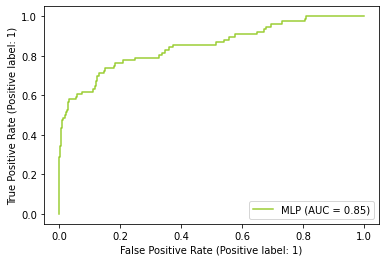

In [87]:
from sklearn.metrics import RocCurveDisplay
y_hat2 = mlp_grid.predict_proba(X_test)[:,1]
RocCurveDisplay.from_predictions(y_test, y_hat2, color='yellowgreen', name = 'MLP')

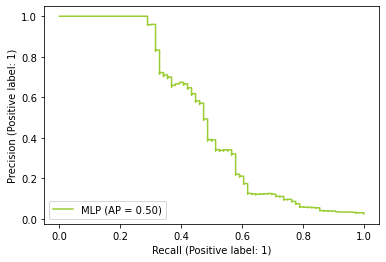

In [84]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_test, y_hat2, name="MLP", color='yellowgreen')

In [78]:
mlp_grid.best_params_

{'classifier__early_stopping': True,
 'classifier__hidden_layer_sizes': 50,
 'classifier__learning_rate_init': 0.01,
 'classifier__random_state': 420}

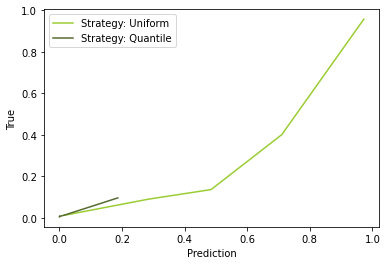

In [88]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Strategy Uniform
prob_true1, prob_pred1 = calibration_curve(y_test, y_hat2, strategy = 'uniform')

# Strategy Quantile
prob_true2, prob_pred2 = calibration_curve(y_test, y_hat2, strategy = 'quantile')

plt.plot(prob_pred1, prob_true1, label='Strategy: Uniform', color='yellowgreen')
plt.plot(prob_pred2, prob_true2, label='Strategy: Quantile', color='darkolivegreen')
plt.ylabel('True')
plt.xlabel('Prediction')
plt.legend(loc='best')
plt.show()